In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

'https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures'


In [5]:
failures = ['normal','collision','fr_collision','obstruction',
           'left_col','right_col','back_col',
           'ok','slightly_moved','moved','lost',
           'collision_in_part','collision_in_tool','bottom_obstruction','bottom_collision']


In [78]:
def read_data(name):
    with open(name, 'r') as f:
        content = f.readlines()
    index = []
    for i in range(len(content)):
        if content[i].replace('\n','') in failures:
            index.append(i)

    all_data = []
    for i in range(len(index)):
        for line in content[index[i]+1:index[i]+16]:
            fail_type = content[index[i]].replace('\n','')
            LINE = line.replace('\n','').split('\t')[1:]
            all_data.append((LINE+[fail_type]+[str(i)]))
    df = pd.DataFrame(np.array(all_data),columns = ['fx','fy','fz','tx','ty','tz','type','window'])
    return df

In [83]:
df_list = []
for file in os.listdir():
    if 'lp' in file:
        df_list.append(read_data(file))
df = pd.concat(df_list,ignore_index=True)
        

In [80]:
df.type.unique()

array(['normal', 'collision', 'obstruction', 'fr_collision',
       'collision_in_tool', 'collision_in_part', 'bottom_obstruction',
       'bottom_collision', 'ok', 'moved', 'slightly_moved', 'lost',
       'back_col', 'right_col', 'left_col'], dtype=object)

([], <a list of 0 Text yticklabel objects>)

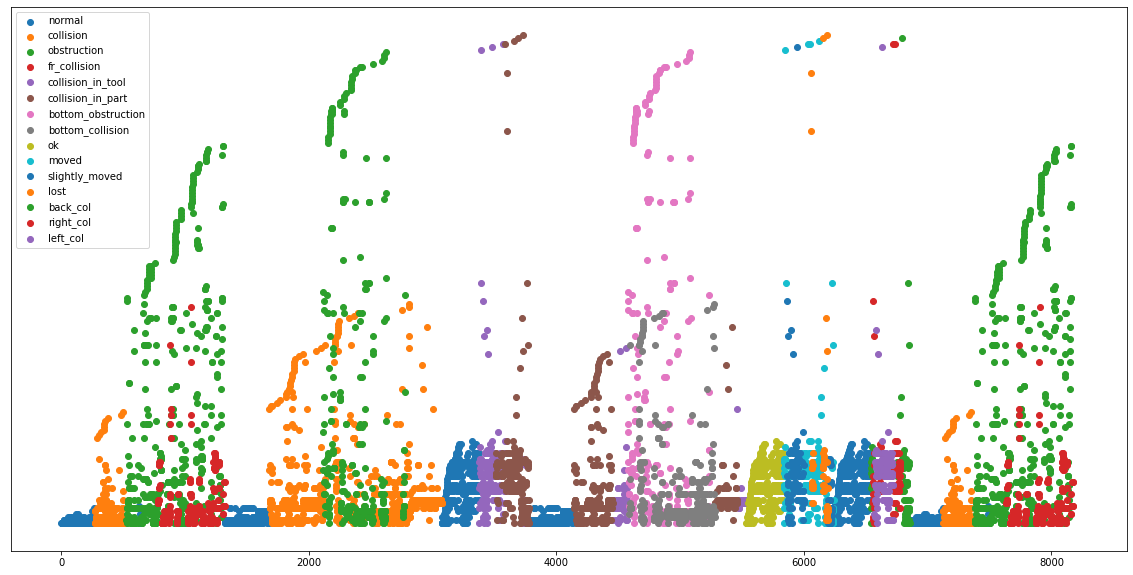

In [91]:
plt.figure(figsize=(20,10))
for types in df.type.unique():
    x = df[df.type==types].index
    y = df[df.type==types].iloc[:,5]
    plt.scatter(x,y)
plt.legend(df.type.unique())
plt.yticks([])

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

/home/pacer/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
X = np.array(df.iloc[:,0:6]).astype(int)
y =  df.type.tolist()

In [29]:
clf.predict(X[400].reshape(1, -1))

'collision_in_tool'